<a href="https://colab.research.google.com/github/cnmurakami/colab-analise-exploratoria-de-dados/blob/main/docs/tutorials/google/colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise exploratória de dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os.path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

%matplotlib inline


# Modifique o diretório para fazer a leitura dos dados em dados_banco.csv

# Dados banco - Leitura dos dados
# Caso necessário, leia a partir de um diretório da sua máquina
# dados = pd.read_csv(f'{pkgdir}/dados_banco.csv', index_col=0)

# Convertendo os arquivos para dataframes, utilizando separadores de ponto-e-vírgula e mantendo caracteres acentados (encoding)
viagem = pd.read_csv('/content/drive/Shareddrives/Analise Exploratoria de Dados/2024_Viagem.csv', index_col=0, sep = ';', encoding='latin-1')
trecho = pd.read_csv('/content/drive/Shareddrives/Analise Exploratoria de Dados/2024_Trecho.csv', index_col=0, sep = ';', encoding='latin-1')

full_data = viagem

# Convertendo valores de moedas para seguir padrão de separação decimal por ponto.
for column in ['Valor diárias', 'Valor passagens', 'Valor outros gastos', 'Valor devolução']:
    full_data[column] = full_data[column].astype(str).str.replace(',','.').replace('[^0-9.]', '', regex=True)
    full_data[column] = pd.to_numeric(full_data[column], errors='coerce')

# Calculando a coluna de Total Gasto para usos futuros
full_data['Total Gasto'] = full_data['Valor diárias'] + full_data['Valor passagens'] + full_data['Valor outros gastos'] - full_data['Valor devolução']


In [ ]:
# Dimensões e tipos de dados da tabela
print("Dimensoes da tabela: {numlin} linhas x {numcol} columns".format(numlin=full_data.shape[0], numcol=len(full_data.columns)))
full_data.info()

Dimensoes da tabela: 555191 linhas x 22 columns
<class 'pandas.core.frame.DataFrame'>
Index: 555191 entries, 18831091 to 2024001455
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Número da Proposta (PCDP)      555191 non-null  object 
 1   Situação                       555191 non-null  object 
 2   Viagem Urgente                 555191 non-null  object 
 3   Justificativa Urgência Viagem  555023 non-null  object 
 4   Código do órgão superior       555191 non-null  int64  
 5   Nome do órgão superior         555191 non-null  object 
 6   Código órgão solicitante       555191 non-null  int64  
 7   Nome órgão solicitante         555191 non-null  object 
 8   CPF viajante                   474790 non-null  object 
 9   Nome                           555191 non-null  object 
 10  Cargo                          349867 non-null  object 
 11  Função                         555191

In [ ]:
# Exemplo dos dados da tabela
full_data.head()

Número da Proposta (PCDP)   Situação Viagem Urgente  \
0                 000011/24  Realizada            NÃO   
1                 000011/24  Realizada            NÃO   
2                 000011/24  Realizada            NÃO   
3                 000011/24  Realizada            NÃO   
4                 000011/24  Realizada            NÃO   

  Justificativa Urgência Viagem  Código do órgão superior  \
0                Sem informação                     26000   
1                Sem informação                     26000   
2                Sem informação                     26000   
3                Sem informação                     26000   
4                Sem informação                     26000   

   Nome do órgão superior  Código órgão solicitante  \
0  Ministério da Educação                     26425   
1  Ministério da Educação                     26425   
2  Ministério da Educação                     26425   
3  Ministério da Educação                     26425   
4  Ministério da Educação                     26425   

      Nome órgão solicitante    CPF viajante                        Nome  ...  \
0  Instituto Federal do Acre  ***.405.257-**  RICARDO DOS SANTOS PEREIRA  ...   
1  Instituto Federal do Acre  ***.405.257-**  RICARDO DOS SANTOS PEREIRA  ...   
2  Instituto Federal do Acre  ***.405.257-**  RICARDO DOS SANTOS PEREIRA  ...   
3  Instituto Federal do Acre  ***.405.257-**  RICARDO DOS SANTOS PEREIRA  ...   
4  Instituto Federal do Acre  ***.405.257-**  RICARDO DOS SANTOS PEREIRA  ...   

  Origem - UF Origem - Cidade Destino - Data             Destino - País  \
0        Acre      Rio Branco     25/02/2024                     Brasil   
1        Acre          Xapuri     25/02/2024                     Brasil   
2         NaN      Washington     18/01/2024  Estados Unidos da América   
3         NaN      Washington     20/01/2024                     Brasil   
4         NaN        Bruxelas     27/01/2024                     Brasil   

        Destino - UF Destino - Cidade Meio de transporte  Número Diárias  \
0               Acre           Xapuri    Veículo Próprio            0,50   
1               Acre       Rio Branco    Veículo Próprio            2,00   
2                NaN       Washington              Aéreo            0,00   
3       Minas Gerais   Belo Horizonte              Aéreo            0,00   
4  Rio Grande do Sul     Porto Alegre              Aéreo            0,00   

   Missao?  Total Gasto  
0      Não       929.18  
1      Sim       929.18  
2      Sim       929.18  
3      Sim       929.18  
4      Sim       929.18  

[5 rows x 34 columns]

In [ ]:
# Dados da tabela trecho
print("Dimensões do Data Frame:",trecho.shape)
print('')
trecho.info()

Dimensões do Data Frame: (1162837, 13)

<class 'pandas.core.frame.DataFrame'>
Index: 1162837 entries, 18831091 to 2024001455
Data columns (total 13 columns):
 #   Column                     Non-Null Count    Dtype 
---  ------                     --------------    ----- 
 0   Número da Proposta (PCDP)  1162837 non-null  object
 1   Sequência Trecho           1162837 non-null  int64 
 2   Origem - Data              1162837 non-null  object
 3   Origem - País              1162837 non-null  object
 4   Origem - UF                1139465 non-null  object
 5   Origem - Cidade            1162837 non-null  object
 6   Destino - Data             1162837 non-null  object
 7   Destino - País             1162837 non-null  object
 8   Destino - UF               1139631 non-null  object
 9   Destino - Cidade           1162837 non-null  object
 10  Meio de transporte         1162837 non-null  object
 11  Número Diárias             1162837 non-null  object
 12  Missao?                    1162837 non-

In [ ]:
# Exemplos de dados da tabela trecho
trecho.head()

Número da Proposta (PCDP)  \
Identificador do processo de viagem                              
18831091                                             000011/24   
18831091                                             000011/24   
18831495                                             000001/24   
18831495                                             000001/24   
18831777                                             000002/24   

                                      Sequência Trecho Origem - Data  \
Identificador do processo de viagem                                    
18831091                                             2    25/02/2024   
18831091                                             1    23/02/2024   
18831495                                             2    22/01/2024   
18831495                                             1    18/01/2024   
18831777                                             2    04/03/2024   

                                     Origem - País   Origem - UF  \
Identificador do processo de viagem                                
18831091                                    Brasil          Acre   
18831091                                    Brasil          Acre   
18831495                                    Brasil     São Paulo   
18831495                                    Brasil  Minas Gerais   
18831777                                    Brasil     São Paulo   

                                     Origem - Cidade Destino - Data  \
Identificador do processo de viagem                                   
18831091                                  Rio Branco     25/02/2024   
18831091                                      Xapuri     25/02/2024   
18831495                                   São Paulo     22/01/2024   
18831495                                  Uberlândia     22/01/2024   
18831777                                   São Paulo     04/03/2024   

                                     Destino - País  Destino - UF  \
Identificador do processo de viagem                                 
18831091                                     Brasil          Acre   
18831091                                     Brasil          Acre   
18831495                                     Brasil  Minas Gerais   
18831495                                     Brasil     São Paulo   
18831777                                     Brasil  Minas Gerais   

                                     Destino - Cidade Meio de transporte  \
Identificador do processo de viagem                                        
18831091                                       Xapuri    Veículo Próprio   
18831091                                   Rio Branco    Veículo Próprio   
18831495                                   Uberlândia              Aéreo   
18831495                                    São Paulo              Aéreo   
18831777                                   Uberlândia              Aéreo   

                                     Número Diárias Missao?  
Identificador do processo de viagem                          
18831091                                       0,50     Não  
18831091                                       2,00     Sim  
18831495                                       0,00     Não  
18831495                                       0,00     Sim  
18831777                                       0,00     Não

In [ ]:
!pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 32.3 MB/s eta 0:00:00


In [ ]:
import plotly.express as px
import pandas as pd
import pycountry

# Dicionário de países para mapeamento do heatmap
country_dict = {
    "afeganistão": "Afghanistan",
    "áfrica do sul": "South Africa",
    "albânia": "Albania",
    "alemanha": "Germany",
    "andorra": "Andorra",
    "angola": "Angola",
    "antígua e barbuda": "Antigua and Barbuda",
    "antártica": "Antarctica",
    "argélia": "Algeria",
    "arábia saudita": "Saudi Arabia",
    "argélia": "Algeria",
    "argentina": "Argentina",
    "armênia": "Armenia",
    "austrália": "Australia",
    "áustria": "Austria",
    "azerbaijão": "Azerbaijan",
    "azerbaidjão": "Azerbaijan",
    "bahamas": "Bahamas",
    "bahrein": "Bahrain",
    "bangladesh": "Bangladesh",
    "barbados": "Barbados",
    "bielorrússia": "Belarus",
    "bélgica": "Belgium",
    "belize": "Belize",
    "benin": "Benin",
    "birmânia": "Myanmar",
    "bósnia e herzegovina": "Bosnia and Herzegovina",
    "botsuana": "Botswana",
    #"brasil": "Brazil",
    "brunei": "Brunei",
    "bulgária": "Bulgaria",
    "burkina faso": "Burkina Faso",
    "burundi": "Burundi",
    "butão": "Bhutan",
    "bélgica": "Belgium",
    "cabo verde": "Cape Verde",
    "camboja": "Cambodia",
    "camarões": "Cameroon",
    "canadá": "Canada",
    "catar": "Qatar",
    "cazaquistão": "Kazakhstan",
    "chade": "Chad",
    "chile": "Chile",
    "china": "China",
    "chipre": "Cyprus",
    "colômbia": "Colombia",
    "comores": "Comoros",
    "congo": "Congo",
    "coreia do norte": "North Korea",
    "coreia do sul": "South Korea",
    "costa rica": "Costa Rica",
    "croácia": "Croatia",
    "cuba": "Cuba",
    "curaçau": "Curaçao",
    "chipre": "Cyprus",
    "dinamarca": "Denmark",
    "djibuti": "Djibouti",
    "dominica": "Dominica",
    "egito": "Egypt",
    "el salvador": "El Salvador",
    "emirados árabes unidos": "United Arab Emirates",
    "equador": "Ecuador",
    "eritreia": "Eritrea",
    "eslováquia": "Slovakia",
    "eslovênia": "Slovenia",
    "espanha": "Spain",
    "estados unidos": "United States",
    "estados unidos da américa": "United States",
    "estônia": "Estonia",
    "eswatini": "Eswatini",
    "etiópia": "Ethiopia",
    "fiji": "Fiji",
    "filipinas": "Philippines",
    "finlândia": "Finland",
    "frança": "France",
    "gabon": "Gabon",
    "gâmbia": "Gambia",
    "gana": "Ghana",
    "geórgia": "Georgia",
    "granada": "Grenada",
    "grécia": "Greece",
    "guatemala": "Guatemala",
    "guiana": "Guyana",
    "guiné": "Guinea",
    "guiné-bissau": "Guinea-Bissau",
    "guerra do líbano": "Lebanon",
    "grenada": "Grenada",
    "groelândia": "Greenland",
    "guiana francesa": "French Guiana",
    "guiné equatorial": "Equatorial Guinea",
    "gibraltar": "Gibraltar",
    "haiti": "Haiti",
    "honduras": "Honduras",
    "hungria": "Hungary",
    "iémen": "Yemen",
    "ilhas cayman": "Cayman Islands",
    "ilhas malvinas": "Falkland Islands",
    "ilhas marshall": "Marshall Islands",
    "ilhas pitcairn": "Pitcairn Islands",
    "ilhas salomão": "Solomon Islands",
    "índia": "India",
    "indonésia": "Indonesia",
    "irã": "Iran",
    "iraque": "Iraq",
    "irlanda": "Ireland",
    "islândia": "Iceland",
    "israel": "Israel",
    "itália": "Italy",
    "jamaica": "Jamaica",
    "japão": "Japan",
    "jordânia": "Jordan",
    "kazajistão": "Kazakhstan",
    "quênia": "Kenya",
    "kiribati": "Kiribati",
    "kosovo": "Kosovo",
    "kuwait": "Kuwait",
    "laos": "Laos",
    "lesoto": "Lesotho",
    "letônia": "Latvia",
    "líbano": "Lebanon",
    "libéria": "Liberia",
    "líbia": "Libya",
    "liechtenstein": "Liechtenstein",
    "lituânia": "Lithuania",
    "luxemburgo": "Luxembourg",
    "madagáscar": "Madagascar",
    "malawi": "Malawi",
    "maldivas": "Maldives",
    "mali": "Mali",
    "malta": "Malta",
    "mancomunidade das bahamas": "Bahamas",
    "marrocos": "Morocco",
    "maurício": "Mauritius",
    "mauritânia": "Mauritania",
    "méxico": "Mexico",
    "moçambique": "Mozambique",
    "moldávia": "Moldova",
    "mônaco": "Monaco",
    "montenegro": "Montenegro",
    "namíbia": "Namibia",
    "nauru": "Nauru",
    "nepal": "Nepal",
    "nicarágua": "Nicaragua",
    "níger": "Niger",
    "nigéria": "Nigeria",
    "noruega": "Norway",
    "nova zelândia": "New Zealand",
    "omã": "Oman",
    "países baixos": "Netherlands",
    "palau": "Palau",
    "panamá": "Panama",
    "papua nova guiné": "Papua New Guinea",
    "paquistão": "Pakistan",
    "paraguai": "Paraguay",
    "peru": "Peru",
    "polônia": "Poland",
    "porto rico": "Puerto Rico",
    "portugal": "Portugal",
    "quênia": "Kenya",
    "república centro-africana": "Central African Republic",
    "república checa": "Czech Republic",
    "república democrática do congo": "Democratic Republic of Congo",
    "república dominicana": "Dominican Republic",
    "república do congo": "Republic of the Congo",
    "ruanda": "Rwanda",
    "rússia": "Russia",
    "saara ocidental": "Western Sahara",
    "samoa": "Samoa",
    "san marino": "San Marino",
    "santa lúcia": "Saint Lucia",
    "senegal": "Senegal",
    "serra leoa": "Sierra Leone",
    "singapura": "Singapore",
    "somália": "Somalia",
    "sri lanka": "Sri Lanka",
    "suazilândia": "Eswatini",
    "sudão": "Sudan",
    "sudão do sul": "South Sudan",
    "suécia": "Sweden",
    "suíça": "Switzerland",
    "suriname": "Suriname",
    "svalbard": "Svalbard",
    "tadjiquistão": "Tajikistan",
    "tailândia": "Thailand",
    "taiwan": "Taiwan",
    "tanzânia": "Tanzania",
    "timor-leste": "East Timor",
    "togo": "Togo",
    "tonga": "Tonga",
    "trindade e tobago": "Trinidad and Tobago",
    "tunísia": "Tunisia",
    "turcomenistão": "Turkmenistan",
    "turquia": "Turkey",
    "tuvalu": "Tuvalu",
    "uganda": "Uganda",
    "ucrânia": "Ukraine",
    "uruguai": "Uruguay",
    "vanuatu": "Vanuatu",
    "vaticano": "Vatican City",
    "venezuela": "Venezuela",
    "vietnã": "Vietnam",
    "zâmbia": "Zambia",
    "zimbábue": "Zimbabwe"
}

# Método para converter o país, caso não esteja em inglês
def get_country_code(country_name):
    try:
        # Acessa o nome no dicionário
        english_name = country_dict[country_name.lower()]
        if english_name:
            return pycountry.countries.get(name=english_name).alpha_3
        else:
            return None
    except AttributeError:
        return None
    except KeyError:
        return None


# Método para criação do heatmap
def get_heatmap(trecho, legenda):
  trecho_grouped = trecho.groupby('Destino - País').size().reset_index(name='Count')
  trecho_grouped['country_code'] = trecho_grouped['Destino - País'].apply(get_country_code)
  # Descarta linhas onde o país não existe ou não foi encontrado
  trecho_grouped = trecho_grouped.dropna(subset=['country_code'])

  # Criação da imagem
  fig = px.scatter_geo(trecho_grouped,
                      locations='country_code',
                      color='Count',
                      hover_name='Destino - País',
                      size='Count',
                      title=legenda)
  fig.update_layout(geo=dict(showframe=False, showcoastlines=False))
  return fig

# Criação do heatmap
fig = get_heatmap(trecho, 'Heatmap de destino (viagens internacionais)')
fig.show()

In [ ]:
# Heatmap de destinos em missão

trecho_filtrado = trecho[trecho['Missao?'].str.lower() == 'sim']
fig = get_heatmap(trecho_filtrado, 'Heatmap de destino em missão (viagens internacionais)')
fig.show()

In [ ]:
# Heatmap de destinos fora de missão

trecho_filtrado = trecho[trecho['Missao?'].str.lower() != 'sim']
fig = get_heatmap(trecho_filtrado, 'Heatmap destino fora de missão (viagens internacionais)')
fig.show()

In [ ]:
# Contagem de contagem (agrupamento por missão)
trecho[trecho['Destino - País'].str.lower() == 'brasil']['Missao?'].value_counts().rename("Viagens nacionais")

Missao?
Não    584828
Sim    554791
Name: Viagens nacionais, dtype: int64

In [ ]:
# Tabela de top 10 de gastos por órgão
gastos_por_orgao = viagem.groupby('Nome órgão solicitante')['Total Gasto'].sum().sort_values(ascending=False).head(10) #Mudar o valor para pegar mais informações
gastos_por_orgao

Nome órgão solicitante
Sem informação                                                              3.771935e+08
Polícia Federal                                                             1.525174e+08
Comando da Aeronáutica                                                      9.292519e+07
Polícia Rodoviária Federal                                                  8.551052e+07
Comando do Exército                                                         7.810400e+07
Instituto Brasileiro do Meio Ambiente e dos Recursos Naturais Renováveis    4.886036e+07
Instituto Nacional do Seguro Social                                         4.682059e+07
Ministério da Defesa - Unidades com vínculo direto                          4.573682e+07
Ministério das Relações Exteriores - Unidades com vínculo direto            4.450014e+07
Presidência da República - Unidades com vínculo direto                      3.816327e+07
Name: Total Gasto, dtype: float64

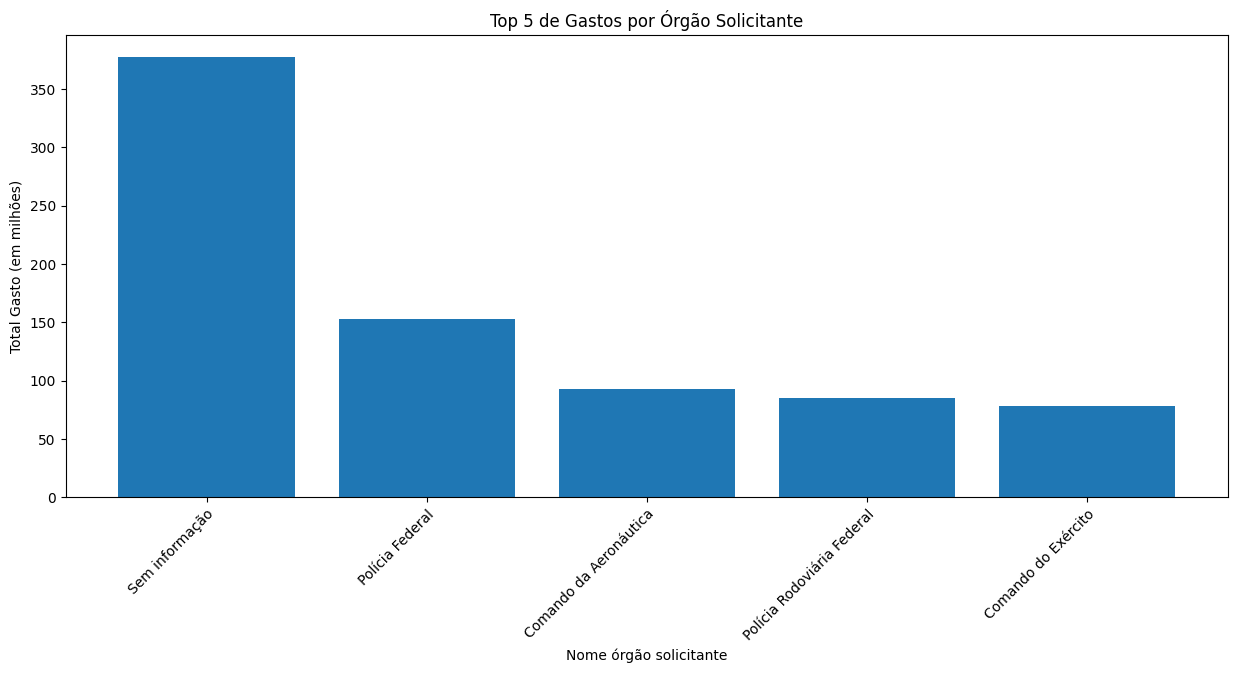

In [ ]:
# Gráfico de Top 5 de Gastos por órgão solicitante

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Método para converter o valor em milhões para centenas
def format_currency(value, pos=None):
    return f"{value/1000000:,.0f}"

# Cria dataframe da soma dos gastos agrupado por órgão solicitante
gastos_por_orgao = full_data.groupby('Nome órgão solicitante')['Total Gasto'].sum().sort_values(ascending=False).head(5) #Mudar o valor de para pegar mais informações

# Define o tamanho do gráfico
plt.figure(figsize=(15, 6))
# Define os valores
plt.bar(gastos_por_orgao.index, gastos_por_orgao.values)
# Define o label do eixo X
plt.xlabel('Nome órgão solicitante')
# Define o label do eixo Y
plt.ylabel('Total Gasto (em milhões)')
# Define o título do gráfico
plt.title('Top 5 de Gastos por Órgão Solicitante')
# Formata as legendas do eixo X
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

# Formata os valores do eixo Y para exibir em centenas
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_currency))

plt.show()

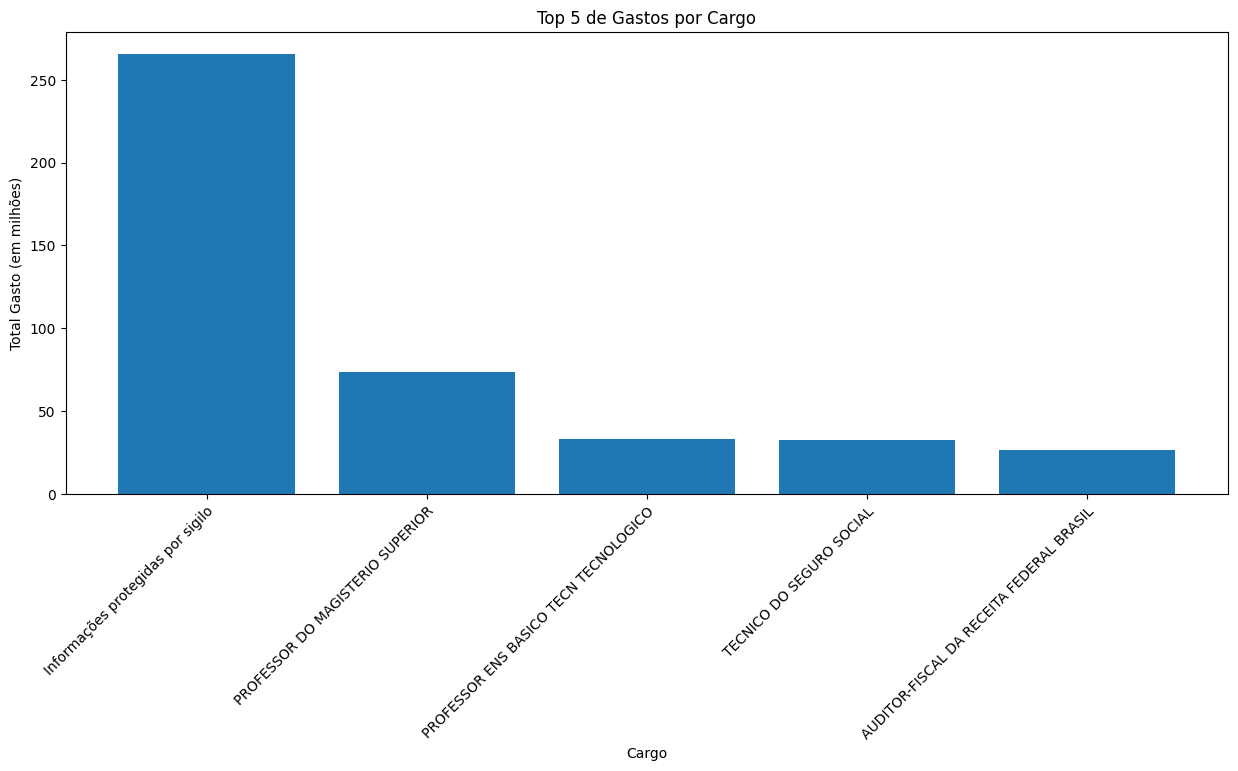

In [ ]:
#Top 5 de Gastos por Cargo

gastos_por_cargo = full_data.groupby('Cargo')['Total Gasto'].sum().sort_values(ascending=False).head(5) #Mudar o valor de head para pegar mais informações

plt.figure(figsize=(15, 6))
plt.bar(gastos_por_cargo.index, gastos_por_cargo.values)
plt.xlabel('Cargo')
plt.ylabel('Total Gasto (em milhões)')
plt.title('Top 5 de Gastos por Cargo')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_currency))

plt.show()

In [ ]:
#Contagem de viagem urgente (p98 de total gasto)

data = full_data[full_data['Total Gasto'] <= np.percentile(full_data['Total Gasto'], 98)].sort_values(by='Total Gasto', ascending=False)
data['Viagem Urgente'].value_counts()

Viagem Urgente
SIM    314920
NÃO    229167
Name: count, dtype: int64

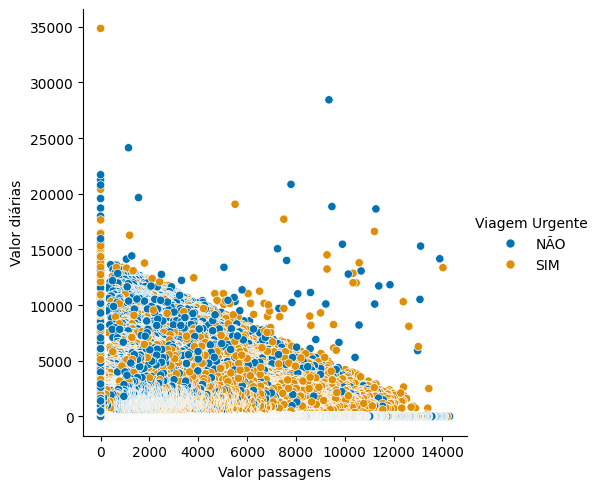

In [ ]:
# Gráfico de dispersão de Valor de passagens X Valor diárias separadas por urgência (p98 de total gasto)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# P98 de total gasto
data = full_data[full_data['Total Gasto'] <= np.percentile(full_data['Total Gasto'], 98)].sort_values(by='Total Gasto', ascending=False)


sns.set_palette('colorblind')
# Separado cores por hue
sns.relplot(x='Valor passagens', y='Valor diárias', hue='Viagem Urgente',  data=data)

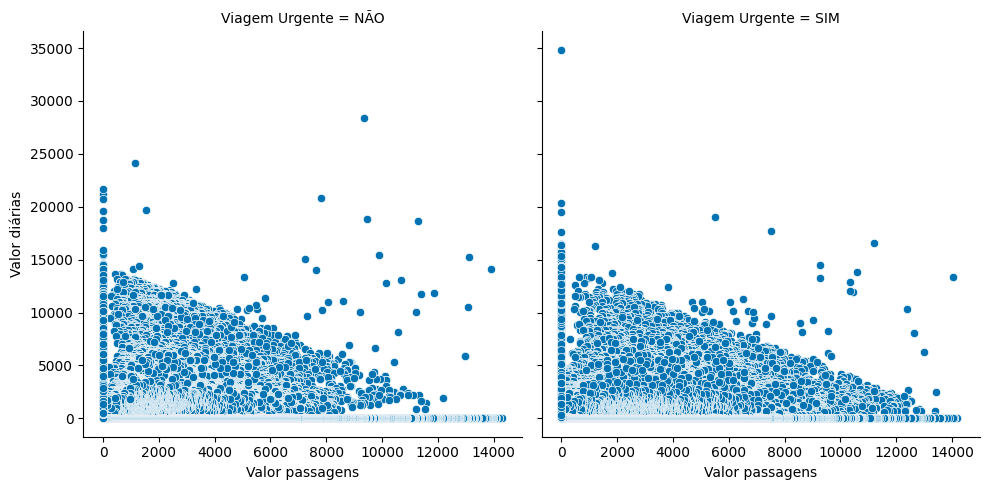

In [ ]:
# Gráfico de dispersão de Valor de passagens X Valor diárias, colunas separadas por urgência (p98 de total gasto)
# Separado por col ao invés de hue
sns.relplot(x='Valor passagens', y='Valor diárias', col='Viagem Urgente',  data=data)

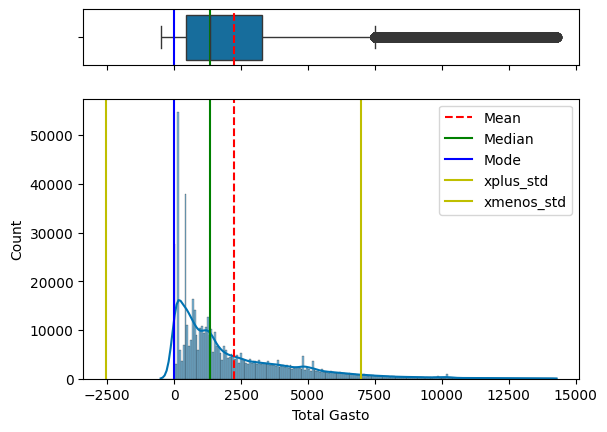

In [ ]:
# Boxplot + Histograma do total gasto

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})

mean=data['Total Gasto'].mean() # Média
median=data['Total Gasto'].median() # Mediana
mode=data['Total Gasto'].mode().values[0] # Moda
mean_plus_std = data['Total Gasto'].mean()+2*data['Total Gasto'].std() # Média + desvio padrão
mean_menos_std = data['Total Gasto'].mean()-2*data['Total Gasto'].std() # Média - desvio padrão

# Boxplot
sns.boxplot(data=data, x="Total Gasto", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

# Histograma
sns.histplot(data=data, x="Total Gasto", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.axvline(mean_plus_std, color='y', linestyle='-', label="xplus_std")
ax_hist.axvline(mean_menos_std, color='y', linestyle='-', label="xmenos_std")

plt.legend()
ax_box.set(xlabel='')
plt.show()

<ipython-input-34-9b21e9070377>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Viagem Urgente', y='Total Gasto', data=data, palette='muted',showfliers=False, showmeans=True)


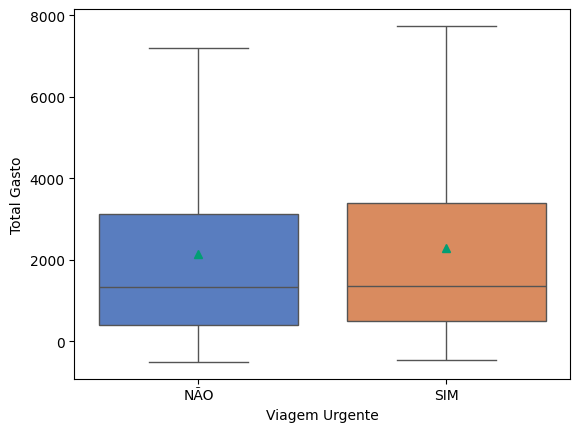

In [ ]:
# Boxplot de viagens urgentes, sem outliers
ax = sns.boxplot(x='Viagem Urgente', y='Total Gasto', data=data, palette='muted',showfliers=False, showmeans=True)

In [ ]:
# Histograma
import plotly
import plotly.express as px

fig = px.histogram(data, x='Total Gasto', marginal='box')
fig.show()

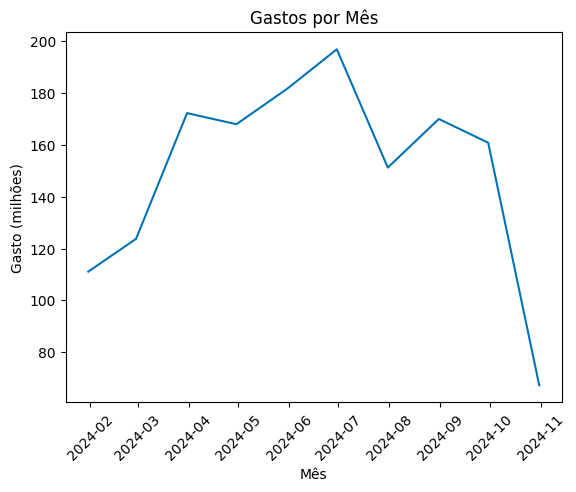

In [ ]:
# Gráfico de linha de gasto por mês

from matplotlib.dates import DateFormatter

# Converte a data para objeto datetime
full_data['Período - Data de início'] = pd.to_datetime(full_data['Período - Data de início'], format='%d/%m/%Y')

# Gasto total agrupado por mês
monthly_expenditure = full_data.groupby(pd.Grouper(key='Período - Data de início', freq='ME'))['Total Gasto'].sum()
# Define final dos dados, visto que a informação está incompleta devido ao ano vigente
end_date = pd.to_datetime('2024-11-01')
monthly_expenditure = monthly_expenditure[monthly_expenditure.index <= end_date]
monthly_expenditure = monthly_expenditure.loc[monthly_expenditure != 0]


# Criação do gráfico de dados
sns.lineplot(x=monthly_expenditure.index, y=monthly_expenditure.values)

# Método para converter milhões em centenas
def format_currency(value, pos=None):
    return f"{value/1000000:,.0f}"

# Define título e labels do gráfico
plt.title('Gastos por Mês')
plt.xlabel('Mês')
plt.ylabel('Gasto (milhões)')
plt.xticks(rotation=45)
# Converte as legendas do eixo Y
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_currency))

plt.show()

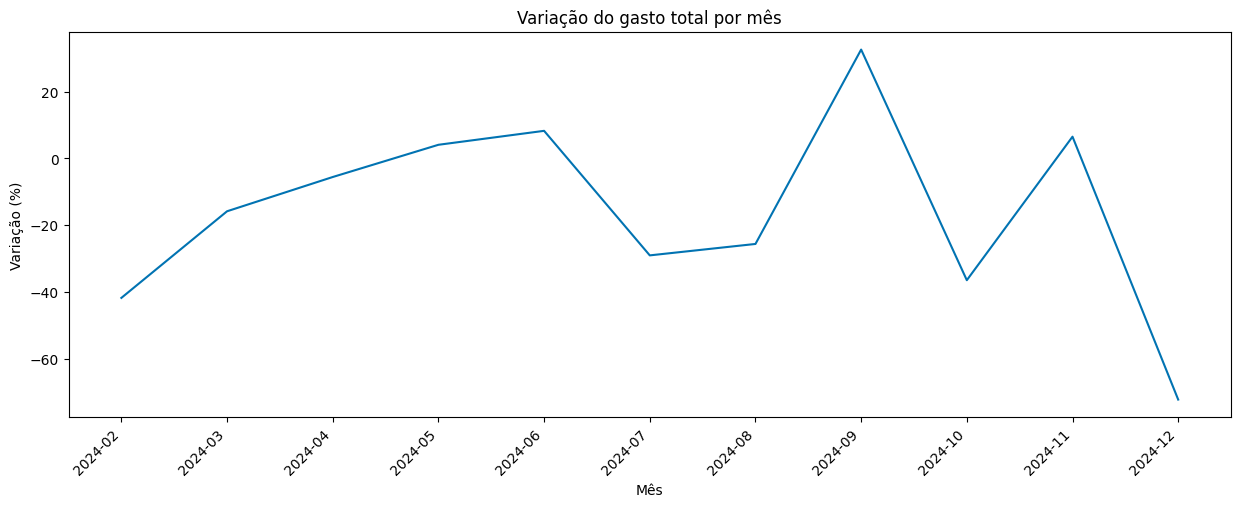

In [ ]:
full_data['Período - Data de início'] = pd.to_datetime(full_data['Período - Data de início'], format='%d/%m/%Y')

# Agrupar por mês e calcular a variação
monthly_variance = full_data.groupby(full_data['Período - Data de início'].dt.to_period('M'))['Total Gasto'].var()

# calcula a porcentagem de variação
percentage_change = monthly_variance.pct_change() * 100

# Cria as labels para o eixo X
month_labels = [str(month) for month in monthly_variance.index]


plt.figure(figsize=(15, 5))
sns.lineplot(x=month_labels, y=percentage_change.values)
plt.title('Variação do gasto total por mês')
plt.xlabel('Mês')
plt.ylabel('Variação (%)')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Método para calcular o máximo, mínimo, média, mediana, moda, desvio padrão e coeficiente de variação
def calc_summary(column):
  max = full_data[column].max() # máximo
  mean = full_data[column].mean() # média
  median = full_data[column].median() # mediana
  min = full_data[column].min() #mínimo
  mode = full_data[column].mode()[0]  # moda
  std = full_data[column].std() # desvio padrão
  cv = (std / mean) * 100 # coeficiente de variação
  # Retorna os valores formatados
  return [f'{max:.2f}', f'{mean:.2f}', f'{median:.2f}', f'{min:.2f}', f'{mode:.2f}', f'{std:.2f}', f'{cv:.2f}']


#Cria dataframe com os valores do método calc_summary do Gasto Total para teste
summary_table = pd.DataFrame({
    "": ["Máximo", "Média", "Mediana", "Mínimo", "Moda", "Desvio Padrão", "Coef. Var. (%)"],
    "Gasto Total": calc_summary("Total Gasto"),

}).style.hide(axis="index")

summary_table

In [ ]:
# Cria dataframe dos sumários de várias colunas diferentes utilizando o método anterior
summary_table = pd.DataFrame({
    "": ["Máximo", "Média", "Mediana", "Mínimo", "Moda", "Desvio Padrão", "Coef. Var. (%)"],
    "Passagens": calc_summary("Valor passagens"),
    "Diárias": calc_summary("Valor diárias"),
    "Devolução": calc_summary("Valor devolução"),
    "Outros gastos": calc_summary("Valor outros gastos"),
    "Gasto Total": calc_summary("Total Gasto"),

}).style.hide(axis="index")

summary_table